In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.graphics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CreditRisk.csv')


In [3]:
print(df.columns)

Index(['City', 'CC_Payments', 'Wage', 'Cost_Living', 'Mtg', 'Default',
       'Vacations', 'Ottawa', 'Vancouver'],
      dtype='object')


In [4]:
df.head

<bound method NDFrame.head of           City  CC_Payments    Wage  Cost_Living    Mtg Default  Vacations  \
0      Toronto        11712   89925        44004  34237      No      13236   
1      Toronto         4114   82327        33111  35928      No      10788   
2      Toronto        15941   68972        12901  37791      No       8326   
3      Toronto        13962   67582        21491  29385      No       7647   
4      Toronto         6150   88983        43084  29614      No      10131   
5      Toronto         5782   85385        27355  56747      No       9037   
6      Toronto         7117   91249        49862  31569      No      10539   
7      Toronto         5802   80215        40582  30924      No      12000   
8      Toronto        15605   74182        24724  43513      No       4457   
9      Toronto        14200   89746        25623  43643      No       8158   
10     Toronto        14440   60521         5066  41720      No       7420   
11     Toronto         7151   7821

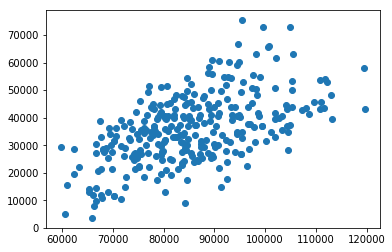

In [5]:
plt.scatter( df.Wage, df.Cost_Living
    ,marker="o")
plt.show()

In [6]:
#Regression with intercept
result = sm.ols(formula='df.Wage ~ df.Cost_Living', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.Wage   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     133.4
Date:                Tue, 26 Jun 2018   Prob (F-statistic):           9.44e-26
Time:                        00:02:23   Log-Likelihood:                -3187.5
No. Observations:                 300   AIC:                             6379.
Df Residuals:                     298   BIC:                             6386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        6.62e+04   1753.250     37.761      0.000    6.28e+04    6.97e+04
df.Cost_Living     0.5318      0.046     11.550      0.000       0.441       0.622
==============================================================================
Omnibus:                       13.055   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.041
Skew:                           0.471   Prob(JB):                      0.00147
Kurtosis:                       2.607   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

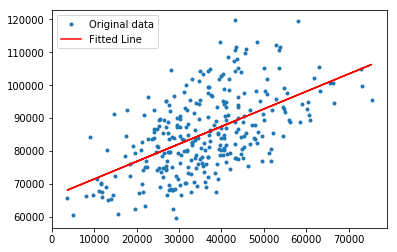

In [7]:
#Graphical Output
plt.plot(df.Cost_Living, df.Wage, 'o', label='Original data', markersize=3)
intercept, slope = result.params
plt.plot(df.Cost_Living, intercept + slope * df.Cost_Living , 'r-', label='Fitted Line')
plt.legend()
plt.show()

In [8]:
#to verify
slope, intercept

(0.53179387198847394, 66203.769087974142)

In [10]:
#Regression without intercept
result2 = sm.ols(formula='df.Wage ~ df.Cost_Living +0', data=df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.Wage   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     3570.
Date:                Tue, 26 Jun 2018   Prob (F-statistic):          2.76e-168
Time:                        00:03:34   Log-Likelihood:                -3450.8
No. Observations:                 300   AIC:                             6904.
Df Residuals:                     299   BIC:                             6907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
df.Cost_Living     2.1735      0.036     59.753      0.000       2.102       2.245
==============================================================================
Omnibus:                        4.635   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.522
Skew:                          -0.300   Prob(JB):                        0.104
Kurtosis:                       3.030   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Regression without intercept (another way)
result3 = sm.ols(formula='df.Wage ~ df.Cost_Living -1', data=df).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.Wage   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     3570.
Date:                Tue, 26 Jun 2018   Prob (F-statistic):          2.76e-168
Time:                        00:04:25   Log-Likelihood:                -3450.8
No. Observations:                 300   AIC:                             6904.
Df Residuals:                     299   BIC:                             6907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
df.Cost_Living     2.1735      0.036     59.753      0.000       2.102       2.245
==============================================================================
Omnibus:                        4.635   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.522
Skew:                          -0.300   Prob(JB):                        0.104
Kurtosis:                       3.030   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""